C:\Users\gandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sample Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  15                      81
2           3  Female   20                  16                       6
3           4    Male   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\gandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

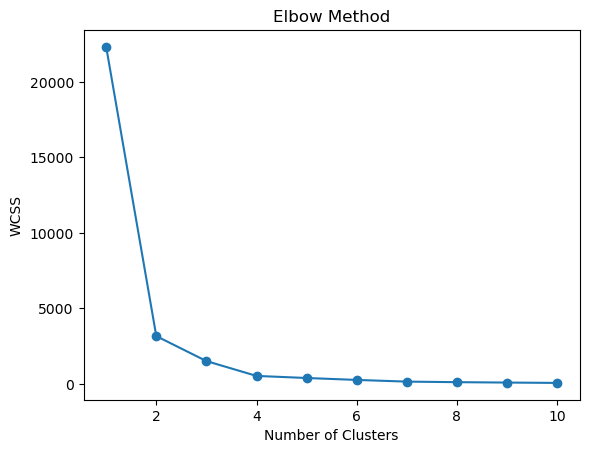

C:\Users\gandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Clustered Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2  Female   21                  15                      81   
2           3  Female   20                  16                       6   
3           4    Male   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        1  
2        2  
3        1  
4        0  


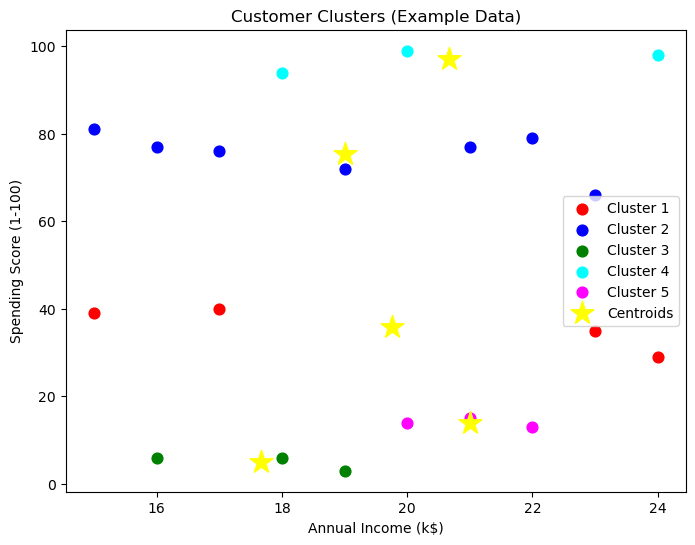

In [2]:
# Task 2 - KMeans Clustering (Mall Customers Dataset Example)
# No external CSV file needed (dataset is created inside the code)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Create dataset (like Mall_Customers.csv)
data = pd.DataFrame({
    "CustomerID": range(1, 21),
    "Gender": ["Male","Female","Female","Male","Female",
               "Male","Male","Female","Female","Male",
               "Female","Male","Female","Male","Male",
               "Female","Female","Male","Female","Male"],
    "Age": [19,21,20,23,31,22,35,23,64,30,
            67,35,58,24,37,22,35,20,52,35],
    "Annual Income (k$)": [15,15,16,16,17,17,18,18,19,19,
                           20,20,21,21,22,22,23,23,24,24],
    "Spending Score (1-100)": [39,81,6,77,40,76,6,94,3,72,
                                14,99,15,77,13,79,35,66,29,98]
})

print("Sample Data:")
print(data.head())

# Step 2: Select features (Income & Spending Score)
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Step 3: Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Step 4: Apply KMeans (choose 5 clusters)
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster info to dataset
data["Cluster"] = y_kmeans
print("\nClustered Data:")
print(data.head())

# Step 5: Visualize Clusters
plt.figure(figsize=(8,6))
colors = ['red','blue','green','cyan','magenta']
for i in range(5):
    plt.scatter(X.values[y_kmeans == i, 0],
                X.values[y_kmeans == i, 1],
                s=60, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title("Customer Clusters (Example Data)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()
